# SLT-CE-6: Pairwise Clustering

<h2 style="background-color:#f0b375;"> References </h2>

<ol>
<li> Pairwise Data Clustering by Deterministic Annealing <br>
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.8.9812&rep=rep1&type=pdf
</li>
</ol>

<h2 style="background-color:#f0b375;"> Setup </h2>

In [215]:
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.utils.validation import check_is_fitted
from sklearn.cluster import SpectralClustering
from scipy.io import loadmat
from functools import reduce
from scipy.spatial import distance

<h2 style="background-color:#f0b375;"> Data </h2>

## ProDom Data
http://prtools.org/disdatasets/index.html#ProDom

In [2]:
prodom = {"input": loadmat("prodom.mat")}
# After some reverse-engineering:
prodom["similarity"] = np.array(prodom["input"]["s"])[0,0][0]
prodom["labels"] =np.array(prodom["input"]["s"])[0,0][2].flatten()

## Protein Data

http://prtools.org/disdatasets/index.html#Protein

In [3]:
protein = {"input": loadmat("protein.mat")}
protein["dissimilarity"] = np.array(protein["input"]["d"])[0,0][0]
protein["labels"] =np.array(protein["input"]["d"])[0,0][2].flatten()

<h2 style="background-color:#f0b375;">
Problem -1<br>
<span style=font-size:50%> Complete all Problems to get the grade "1" </span>
</h2>

<p style="background-color:#adebad;">
    Implement the function <b>plt_pairwise</b> according to its docstring.
</p>

In [4]:
def plt_pairwise(data, labels, cmap="binary", alpha=0.9):
    """Plot (dis-)similarity data
    
    Args:
        data (np.ndarray): Symmetric (dis-)similarity array (n_samples, n_samples)
        labels (np.array): Cluster label array  (n_samples,)
        cmap (str): Color Map for (dis-)similarity values
        alpha (float): Opacity of cluster overlay, between 0 and 1
        
    Shows:
        Image plot of (dis-)similarity matrix, overlaid with transparent blocks,
        which indicate the clusters contained in labels.
        Note: Permute the data according to the sorting of the labels.
        
    Prints:
        Minimum, Maximum and Median of (dis-)similarity values
        Warning, if (dis-)similarity matrix is not symmetric
    """
    
    idx_sort = np.argsort(labels)
    labels_sort = labels[idx_sort]
    data_sort = data[idx_sort][:, idx_sort]
    
    color_block = np.dot(np.ones([int(0.06* len(labels)), 1]), labels_sort.reshape(1, -1))

    fig,ax = plt.subplots()
    plt.imshow(data_sort, cmap= cmap)
    plt.contourf(color_block, alpha = alpha, cmap = 'Pastel1')
    plt.show()
    
    print('Minimum (dis-)similarity: '+ str(np.min(data)))
    print('Maximum (dis-)similarity: '+ str(np.max(data)))
    print('Median (dis-)similarity: '+ str(np.median(data)))
    
    tol=1e-8
    if not np.allclose(data, data.T, atol=tol):
        print('Warning: (dis-)similarity matrix is not symmetric')
    

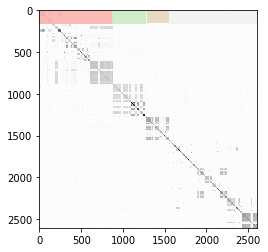

Minimum (dis-)similarity: -15529
Maximum (dis-)similarity: 478835
Median (dis-)similarity: -8847.0


In [5]:
# This is how the output should look like
plt_pairwise(prodom["similarity"], prodom["labels"])

##AD: I personally would color the whole picture

<p style="background-color:#adebad;">
    Demonstrate your implementation of <b> plt_pairwise </b> below.
</p>

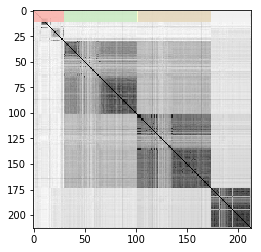

Minimum (dis-)similarity: 0.0
Maximum (dis-)similarity: 13.64
Median (dis-)similarity: 11.23


In [6]:
plt_pairwise(protein["dissimilarity"], protein["labels"], cmap="gray")

<h2 style="background-color:#f0b375;">
Problem 0
</h2>

<p style="background-color:#adebad;">
    Read reference [1] and recapitulate their Algorithm II and III. <br>
    Make sure that every variable is properly defined in your recap.
</p>

## Algorithm II

Initialize $\varepsilon_{i\nu}^{* \, (0)}$ and $\langle M_{i \nu}\rangle ^{(0)} \in (0, 1)$ randomly; temperature $T \leftarrow T_0$ <br>
While $T > T_{Final}$ <br>
> $t \leftarrow 0$; <br>
> Repeat

> > E-like step: estimate  $\langle M_{i \nu}\rangle ^{(t+1)}$ as a function of $\varepsilon_{i\nu}^{* \, (t)}$; <br>
> > M-like step: calculate $\varepsilon_{i\nu}^{* \, (t+1)}$ for given $\langle M_{i \nu}\rangle ^{(t+1)}$; <br>
> > $t \leftarrow t+1$; <br>

> Until all $(\langle M_{i \nu} \rangle^{(t)}, \varepsilon_{i\nu}^{* \, (t)} )$ satisfy Eq (26) <br>
> $T \leftarrow T/2$; $\langle M_{i \nu} \rangle^{(0)} \leftarrow \langle M_{i \nu}\rangle ^{(t)}$; $\varepsilon_{i\nu}^{* \, (0)} \leftarrow \varepsilon_{i\nu}^{* \, (t)}$; <br>

where $\varepsilon_{i\nu}^{*}$ are the potentials, representing the partial cost for assigning datum $i$ to cluster $\nu$ <br>
$\langle M_{i \nu}\rangle$ is the optimal assignments with $\sum_\nu \langle M_{i \nu}\rangle = 1$ <br>
$T$ is the temperature used for cooling during the annealing process <br>

For the E-like step, following formula is used:
$$ \langle M_{i \alpha}\rangle = \frac{exp(- \varepsilon_{i\alpha}^{*}/ T) }{\sum_{\nu = 1}^K exp(- \varepsilon_{i\nu}^{*}/ T)} $$

For the M-like step:
$$\varepsilon_{i\nu} = \frac{1}{\langle p_vrlangle N} \sum_{k=1}^N \langle M_{k \nu} \rangle \bigg( D_{ik} - \frac{1}{2 \langle p_v\rangle N} \sum_{j=1}^N \langle M_{j v} \rangle D_{jk} \bigg) $$ 


## Algorithm III
Initialize $\hat{x}_i^{0}$ and $\langle M_{i \nu}\rangle ^{(0)} \in (0,1)$ randomly; $t=0$; temperature $T \leftarrow T_0$; <br>
While $T > T_{final}$:
> Repeat
> > E-like step: estimate  $\langle M_{i \nu}\rangle ^{(t+1)}$ as a function of {$\hat{x}_i, \hat{y}_\nu$} <br>
> > M-like step:
> > > Repeat
> > > > Calculate $\hat{x}_i^{(t+1)}$ given $\langle M_{i \nu}\rangle ^{(t+1)}$ and $\hat{y}_\nu^{(t+1)}$ <br>
> > > > update $\hat{y}_\nu^{(t+1)}$ to fulfill the centroid condition <br>

> > > Until convergence

> > $t \leftarrow t+1$ 

> Until convergence <br>
> $T \leftarrow T/2$; $\langle M_{i \nu}\rangle ^{(0)} \leftarrow \langle M_{i \nu}\rangle ^{(t)}$; $\hat{x}^{(0)} \leftarrow \hat{x}^{(t)}$; $\hat{y}_\nu^{(0)} \leftarrow \hat{y}_\nu^{(t)}$

$\langle M_{i \nu}\rangle$, $T$ as above <br>
$y_\nu = \sum_{k=1}^{N} M_{k \nu} x_k / \sum_{k=1}^N M_{k \nu}$ the centroids <br>
{$x_i | x_i \in R ^d: 1 \leq i \leq N$} the embedding coordinates

For the E-like step:
 $$\varepsilon_{k \nu} = || x_k - y_\nu ||^2$$
 and M as in algorithm II
 
 For the M-like step:
 $$ K_i x_i \approx \frac{1}{2} \sum_{\nu = 1}^K \langle M_{i\nu} \rangle \bigg( ||y_\nu||^2 - \varepsilon_{i\nu}^* \bigg) \bigg( y_\nu - \sum_{\mu=1}^K \langle M_{i\mu} \rangle y_{\mu} \bigg)$$
 
 $$ K_i = \bigg( \langle y y^T\rangle_i - \langle y \rangle_i \langle y \rangle_i^T \bigg)$$
 
 

<h2 style="background-color:#f0b375;"> Problem 1 </h2>

<p style="background-color:#adebad;">
    Implement the <b>fit_predict </b> method without embedding for the template class PairwiseClustering, according to its docstring. <br>
    You can add more class methods if necessary.
</p>

In [222]:
class PairwiseClustering(skl.base.BaseEstimator, skl.base.TransformerMixin):
    """Template class for PairwiseClustering (PC)
    
    Attributes:
        M (np.ndarray): Assignment probability matrix (n_samples, n_clusters)
        centroids (np.ndarray): Embedding centroids (n_clusters, n_components), used only if embed is True.
        embeddings (np.ndarray): Embeddings of input samples (n_samples, n_components),
                                 used only if embed is True.
    Parameters:
        n_clusters (int): Maximum number of clusters.
        random_state (int): Random seed.
        embed (bool): Indicator, if data should be clustered and embedded simultaneously (algorithm III),
                      or not (algorithm II).
        n_components (int): Dimension of embedding space, used only if embed is True
    """
    
    def __init__(self, n_clusters=4, random_state=42, embed=False, n_components=2):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.embed = embed
        self.n_components = n_components
        # Add more parameters, if necessary.
    
    def fit_predict(self, X):
        """Compute PC for dissimilarity matrix X
        
        Compute cluster assignments. If embed is True, also compute embeddings/centroids.
         
        Args:
            X (np.ndarray): Dissimilarity matrix (n_samples, n_samples)
        
        Returns:
            C (np.ndarray): Assignments (n_samples,) 
        """
        N = X.shape[0]
        
        # for proteins, dissimilarity matrix is symmetric and the diagonal elements are 0
        D = X
        
        if np.min(D)< 0:
            print('Negative Values encountered in dissimilarity matrix')
            # shift invariance of cost function and assignment
            D-= np.min(D)
            
        # initialize M (n_samples, n_clusters) randomly
        M = np.random.rand(N , self.n_clusters)
        M /= np.sum(M, axis = 1).reshape(-1, 1)
            
        # initialize E
        E = np.random.rand(N, self.n_clusters)
            
        # initialize temperature
        T = 10/ np.max(D)
            
        T_final = 1e-5
            
        # convergence of EM
        tol = 1e-8
            
        
        
        if self.embed:
            # embedding vectors
            x = np.random.rand(N, self.n_components)
            
            # calculate centroids
            y = np.dot(M.T, x) / np.sum(M, axis = 0).reshape(-1, 1)
            
            while T > T_final:
                
                t = 0
                
                while True:
                        
                    # E-like step
                    # update potential
                    E_old = E
                    E = distance.cdist(x, y, 'sqeuclidean')
                    
                    log_M_exp = - E/T
                    
                    Z = reduce(np.logaddexp, log_M_exp.T, -np.Inf) 

                    M = np.exp(log_M_exp- Z. reshape(-1, 1))                   

            
        else:
            
            # temperature
            while T > T_final:
                
                t= 0
                
                # convergence of EM
                while True:
                    E_old = E
                    
                    # M-like step
                    n, k = M.shape

                    mdm = (M.T).dot(D).dot(M)
                    sum_M1 = np.outer(np.ones((n,)), M.sum(0)) - M
                    sum_outer = D.dot(M) - (1 / (2 * sum_M1)) * np.outer(np.ones((n,)), np.diag(mdm))

                    E = (1 / (sum_M1 + 1)) * sum_outer
                    
                    '''
                    pv = np.sum(M, axis = 0)/ N
                    
                    for i in range(N):
                        for nu in range(self.n_clusters):
                            
                            E_update = 0
                            
                            for k in range(N):      
                                E_update += M[k, nu]*( D[i, k])- 1/(2* pv[nu]* N)* np.dot(M[:, nu], D[:, k])
                                
                            E[i, nu] = 1/ (pv[nu]* N)* E_update
                    '''
                    
                    
                    # E-like step
                    
                    log_M_exp = - E/T
                    
                    Z = reduce(np.logaddexp, log_M_exp.T, -np.Inf) 
                    
                    # avoid numerical issues
                    #M_exp[np.where(M_exp ==0)] = 1e-6

                    M = np.exp(log_M_exp- Z. reshape(-1, 1))

                    '''
                    M = np.exp(-E/ T)
                    M /= np.sum(M, axis = 1). reshape(-1, 1)
                    '''
                    
                    # convergence
                    if np.allclose(E, E_old, atol = tol):
                        #print(t)
                        break
                        
                    t += 1
                    
                # update Temperature
                T /= 2
            
            # assignments
            C = np.argmax(M, axis = 1)
        
        return C
    
    def cost(self, D, M):
        """Compute the costs of the clustering solution M for dissimilarity D.
        
        The costs refer to the pairwise clustering costs in eq. (16) of reference [1].
        
        Args:
            D (np.ndarray): Dissimilarity matrix (n_samples, n_samples)
            M (np.ndarray): Assignment probability matrix (n_samples, n_clusters)
            
        Returns:
            cost (float): Costs of current clustering
        """
        
        raise NotImplementedError
        
        return cost

<p style="background-color:#adebad;">
    Create an instance of your PC class, then fit and predict the Protein data. <br>
    Repeat the same with sklearn.SpectralClustering. <br>
    Record the execution time.
</p>

In [223]:
%%time
PC = PairwiseClustering()
labels_pair = PC.fit_predict(protein["dissimilarity"])

print(np.unique(labels_pair, return_counts = True))

(array([0, 1, 2, 3], dtype=int64), array([71, 36, 69, 37], dtype=int64))
Wall time: 46.9 ms


In [224]:
%%time
SC = skl.cluster.SpectralClustering(n_clusters=4, random_state=42, affinity="precomputed")
affinities = np.exp(- protein["dissimilarity"] / 3) # SC takes positive affinities as input
labels_spectral= SC.fit_predict(affinities)

##AD: It wasn't asked, but plotting the dissimilarity matrices would be nice to compare the results

Wall time: 78.1 ms


<h2 style="background-color:#f0b375;"> Problem 2 </h2>

<p style="background-color:#adebad;">
    Complete the function <b>compare_clusterings</b>, and use it to compare spectral clustering and pairwise clustering.
</p>

In [225]:
def compare_clusterings(labels_true, **labels_pred):
    """Show a summary of different clustering metrics
    
    Args:
        labels_true (array): Ground-truth cluster labels
    
    Note:
        Each kwarg should be an array with predicted labels
    """
    n_pred = len(labels_pred)

    scores = []
    ylabel = []
    
    for name in dir(skl.metrics.cluster):
        score = getattr(skl.metrics.cluster, name)
        try:
            score(labels_true=[0], labels_pred=[0]) # Check if score takes the right arguments
            if "score" not in score.__name__:
                raise TypeError
            if score.__name__ == "mutual_info_score": # Exclude, not normalized to 1.0
                raise TypeError
        except TypeError:
            continue
        else:
            scores.append(score)
            ylabel.append(score.__name__)
        
    fig, ax = plt.subplots(figsize = (10, 6))
    width = 1/ (n_pred+ 1)
    ind = np.float16(np.arange(len(scores)))
    legend = []
    
    for key, val in labels_pred.items():
        score_value = []
        legend.append(key)
        
        for score in scores:
            score_value.append(score(labels_true, val))
        
        ax.barh(ind, score_value, width)

        ind += width* np.ones([len(ind)])
    
    ax.set_yticks(ind- (n_pred+ 1)/2* width* np.ones([len(ind)]))
    ax.set_yticklabels(ylabel)
    ax.set_xlim([0, 1.1])
    ax.legend(legend)
    plt.show()

change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860


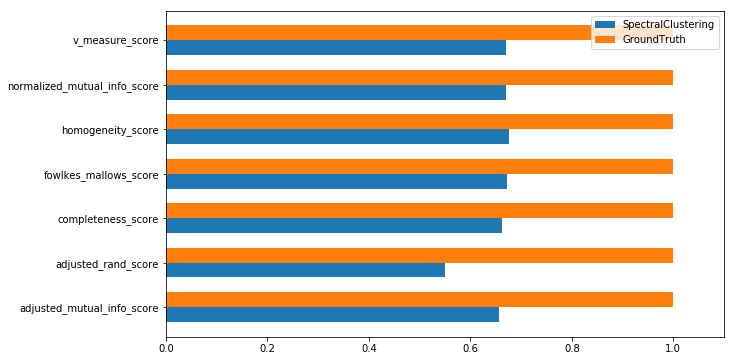

In [226]:
# Example of how the output should look like
compare_clusterings(labels_true=protein["labels"],
                    SpectralClustering=labels_spectral,
                    GroundTruth=protein["labels"])

<p style="background-color:#adebad;">
    Demonstrate your implementation of compare_clusterings below
</p>

change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860


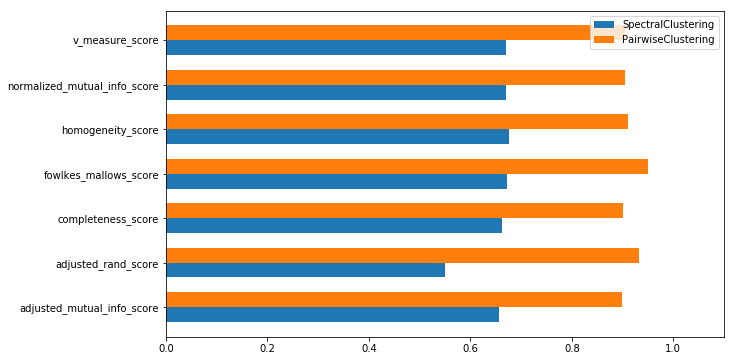

In [228]:
compare_clusterings(labels_true=protein["labels"],
                    SpectralClustering=labels_spectral,
                    PairwiseClustering=labels_pair)

<h2 style="background-color:#f0b375;"> Problem 3 </h2>

<p style="background-color:#adebad;">
    As PairwiseClustering takes dissimilarities as input, we need to transform the similarity data from Prodom accordingly.<br>
    Run fit_predict with all the transforms/params below, and run one compare_clusterings for each set of parameters.<br>
    Finally, produce a separate compare_clusterings with the best parameter from each transform.
</p>

(array([1, 2, 3, 4], dtype=uint8), array([ 878,  404,  271, 1051], dtype=int64))
(array([0, 1, 2, 3], dtype=int64), array([ 145,  348,  474, 1637], dtype=int64))
(array([0, 1, 2, 3], dtype=int64), array([ 495,  348,  297, 1464], dtype=int64))
(array([0, 1, 2, 3], dtype=int64), array([1464,  258,  667,  215], dtype=int64))
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860


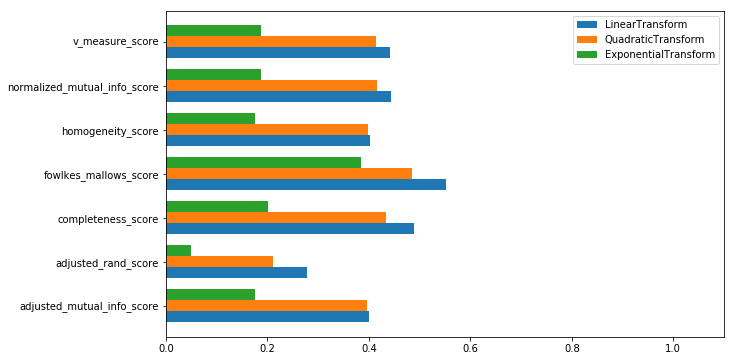

In [235]:
# D = ((max(S) - S) / (max(S) - min(S))) ** a
# a = [1, 2, exp]

# note the dissimilarity matrix has nonzero values on its diagonal!

S = prodom["similarity"]
D = (np.max(S) - S) / (np.max(S) - np.min(S))

labels_pair_transform1_lin = PC.fit_predict(D)
labels_pair_transform1_quad = PC.fit_predict(D**2)
labels_pair_transform1_exp = PC.fit_predict(np.exp(D))

#print(np.unique(prodom["labels"], return_counts = True))
#print(np.unique(labels_pair_transform1_lin, return_counts = True))
#print(np.unique(labels_pair_transform1_quad, return_counts = True))
#print(np.unique(labels_pair_transform1_exp, return_counts = True))

compare_clusterings(labels_true = prodom["labels"],
                    LinearTransform = labels_pair_transform1_lin,
                    QuadraticTransform = labels_pair_transform1_quad,
                    ExponentialTransform = labels_pair_transform1_exp)

Negative Values encountered in dissimilarity matrix
metrics
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860


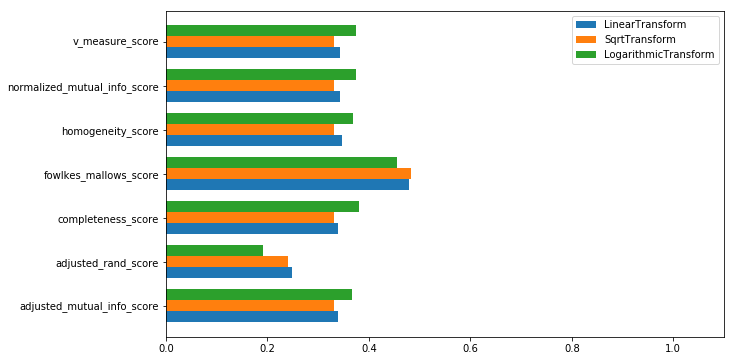

In [237]:
# D = (max(S) / (1 + S - min(S))) ** a
# a = [1, 1/2, log]

S = prodom["similarity"]
D = np.max(S)* 1./ (1+ S- np.min(S))

labels_pair_transform2_lin = PC.fit_predict(D)
labels_pair_transform2_sqrt = PC.fit_predict(D**0.5)
labels_pair_transform2_log = PC.fit_predict(np.log(D))

compare_clusterings(labels_true = prodom["labels"],
                    LinearTransform = labels_pair_transform2_lin,
                    SqrtTransform = labels_pair_transform2_sqrt,
                    LogarithmicTransform = labels_pair_transform2_log)

change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860


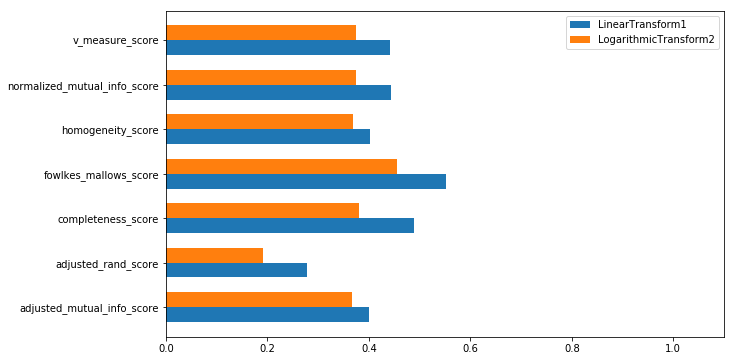

In [240]:
# Compare best clusterings
compare_clusterings(labels_true = prodom["labels"],
                    LinearTransform1 = labels_pair_transform1_lin,
                    LogarithmicTransform2 = labels_pair_transform2_log)

<p style="background-color:#adebad;">
    Develop an other reasonable transform from similarity to dissimilarity, and compare it to the other settings.
</p>

change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860
change Users\Roman\Anaconda3\Lib\site-packages\sklearn\metrics\cluster\supervised.py l860


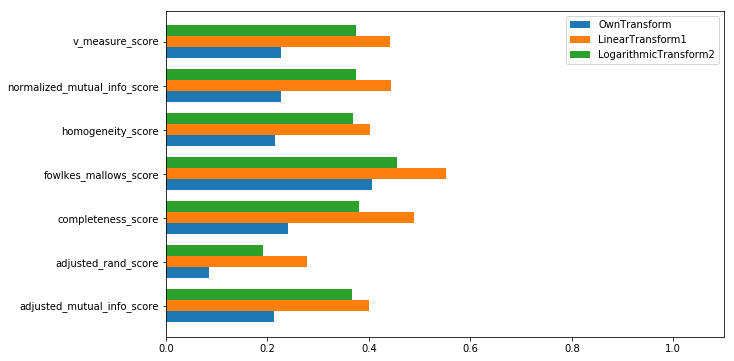

In [241]:
S = prodom["similarity"]
D = (S- np.min(S))/ (np.max(S)- np.min(S))

D = 1- S/ np.max(np.abs(S))
D /= np.max(D) # due to numerical issues the max entry > 0

labels_pair_own = PC.fit_predict(D)

compare_clusterings(labels_true = prodom["labels"],
                    OwnTransform = labels_pair_own,
                    LinearTransform1 = labels_pair_transform1_lin,
                    LogarithmicTransform2 = labels_pair_transform2_log)



<h2 style="background-color:#ef7575;">
Extension 1  
<span style=font-size:50%> Complete all Extensions to get the grade "2" </span>
</h2>

<ul style="background-color:#adebad;">
        <li>
            Implement the embed == True part of <b>PC.fit_predict</b> (algorithm III).
        </li>
    </ul>

<ul style="background-color:#adebad;">
        <li>
        Cluster the protein data, and properly visualize the the embedding for n_components=2.
        </li>
    </ul>

In [221]:
PCE = PairwiseClustering(embed=True)
PCE.fit_predict(protein["dissimilarity"])

(213, 2)
(4, 2)
(213, 4)
0.0009731786875741768


NameError: name 'dfsdf' is not defined

In [ ]:
# Visualize PCE.embeddings, including PCE.centroids

<h2 style="background-color:#ef7575;"> Extension 2 </h2>

<ul style="background-color:#adebad;">
    <li>
        Re-run fit_predict with different random seeds and plot the distribution of clustering costs as shown in figure 1 of reference [1]. <br> Perform the experiment for all the settings listed below, and visualize the results properly.
    </li>
</ul>

In [ ]:
# data = [protein, prodom]
# Use the best transform from Problem 3 to transform similarities
# other parameters are default
PC = PairwiseClustering(random_state=...)

In [ ]:
# n_clusters = [2, 4, 6, 8]
# data = protein
# other parameters are default
PC = PairwiseClustering(random_state=...)

In [ ]:
# embed = [True, False]
# data = protein
# other parameters are default
PC = PairwiseClustering(random_state=...)

In [ ]:
# n_components = [True, False]
# embed = True
# data = protein
# other parameters are default
PC = PairwiseClustering(random_state=...)

<h2 style="background-color:#4286f4;"> Comments </h2>

Let us know what you liked about this exercise, and what we can improve!